In [1]:
import numpy as np
import numpy.ma as ma
import os
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import itertools
from matplotlib import gridspec

import sys
sys.path.append('/scratch9/mkron/software/DeepIceLearning/Plots')
import plot_functions_mk as pfmk

In [9]:
DATA_DIR = "/scratch9/mkron/data/NN_out/run72/"
predictions_mctrue = pickle.load(file(os.path.join(DATA_DIR, 'prediction.pickle')))
epochs_acc_loss = np.delete(np.genfromtxt(os.path.join(DATA_DIR, "loss_logger.csv"), delimiter=','), 0, axis=0).T

In [10]:
#Target 1
acc_train_1 = epochs_acc_loss[1]
loss_train_1 = epochs_acc_loss[2]
acc_val_1 = epochs_acc_loss[10]
loss_val_1 = epochs_acc_loss[11]
pred_label_1 = predictions_mctrue["prediction"][0] #list with probability for each class
true_label_1 = predictions_mctrue["mc_truth"]["ClassificationLabel_truth"][:len(pred_label_1)]-1


#Target 2
acc_train_2 = epochs_acc_loss[3]
loss_train_2 = epochs_acc_loss[4]
acc_val_2 = epochs_acc_loss[12]
loss_val_2 = epochs_acc_loss[13]
pred_label_2 = predictions_mctrue["prediction"][1] #list with probability for each class
true_label_2 = predictions_mctrue["mc_truth"]["StartingLabel_truth"][:len(pred_label_2)]


#Target 3
acc_train_3 = epochs_acc_loss[5]
loss_train_3 = epochs_acc_loss[6]
acc_val_3 = epochs_acc_loss[14]
loss_val_3 = epochs_acc_loss[15]
pred_label_3 = predictions_mctrue["prediction"][2] #list with probability for each class
true_label_3 = predictions_mctrue["mc_truth"]["CoincidenceLabel_truth"][:len(pred_label_3)]


#Target 4
acc_train_4 = epochs_acc_loss[7]
loss_train_4 = epochs_acc_loss[8]
acc_val_4 = epochs_acc_loss[16]
loss_val_4 = epochs_acc_loss[17]
pred_label_4 = predictions_mctrue["prediction"][3] #list with probability for each class
true_label_4 = predictions_mctrue["mc_truth"]["UpDownLabel_truth"][:len(pred_label_4)]

#Energy
energy=[]
for i in xrange(0, len(pred_label_4)):
    energy.append(predictions_mctrue["reco_vals"][i][0])
energy = abs(np.array(energy))

# Number of hit DOMs
hitDOMs = predictions_mctrue["HitDOMs"][:len(pred_label_4)]
hitDOMs = np.array(hitDOMs)

###### Allocation of variables

## Acc and Loss for different Targets

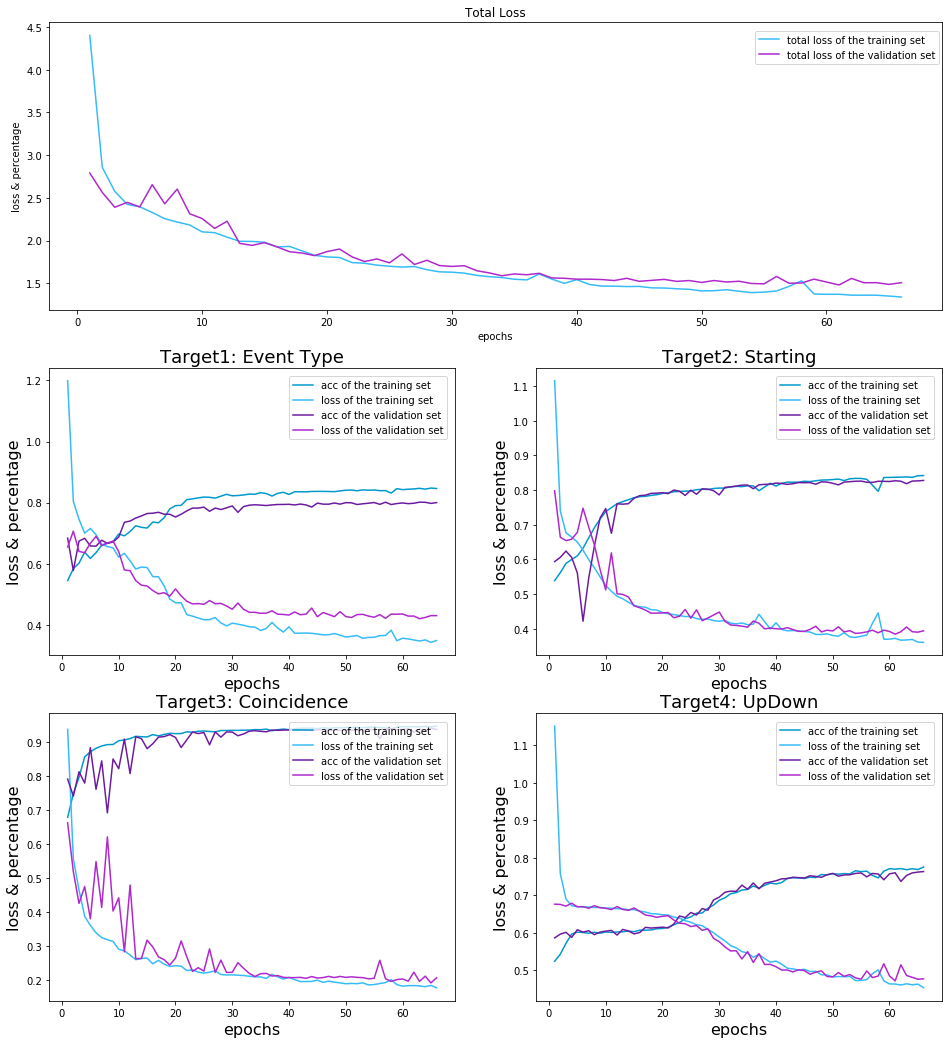

In [11]:
fig = plt.figure(figsize=(16,18))

ax0 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
x = np.linspace(1, len(epochs_acc_loss[0]), num=len(epochs_acc_loss[0]), endpoint=True)
ax0.plot(x, epochs_acc_loss[9], color="#35bcf8", label="total loss of the training set")
ax0.plot(x, epochs_acc_loss[18], color='#af27cd', label="total loss of the validation set")
ax0.legend(bbox_to_anchor=(0.79, 0.97), loc=2, borderaxespad=0.)
ax0.set_ylabel('loss & percentage')
ax0.set_xlabel("epochs")
ax0.set_title("Total Loss")

ax1 = plt.subplot2grid((3, 2), (1, 0), colspan=1)
ax1 = pfmk.acc_loss_plot(acc_train_1, loss_train_1, acc_val_1, loss_val_1, "Target1: Event Type")

ax2 = plt.subplot2grid((3, 2), (1, 1), colspan=1)
ax2 = pfmk.acc_loss_plot(acc_train_2, loss_train_2, acc_val_2, loss_val_2, "Target2: Starting")

ax3 = plt.subplot2grid((3, 2), (2, 0), colspan=1)
ax3 = pfmk.acc_loss_plot(acc_train_3, loss_train_3, acc_val_3, loss_val_3, "Target3: Coincidence")

ax4 = plt.subplot2grid((3, 2), (2, 1), colspan=1)
ax4 = pfmk.acc_loss_plot(acc_train_4, loss_train_4, acc_val_4, loss_val_4, "Target4: UpDown")

In [12]:
# Identify the overall best run  
sum_acc_val = acc_val_1 + acc_val_2 + acc_val_3 + acc_val_4

print "ACC for the single Targets of the overall best epoch"
print "Acc on Validation Set of Target 1 Event Type : {}%".format(round(np.max(acc_val_1[np.argmax(sum_acc_val)])*100 ,2))
print "Acc on Validation Set of Target 2 Starting   : {}%".format(round(np.max(acc_val_2[np.argmax(sum_acc_val)])*100 ,2))
print "Acc on Validation Set of Target 3 Coincidence: {}%".format(round(np.max(acc_val_3[np.argmax(sum_acc_val)])*100 ,2))
print "Acc on Validation Set of Target 3 UpDown     : {}%".format(round(np.max(acc_val_4[np.argmax(sum_acc_val)])*100 ,2))

print np.argmax(sum_acc_val)

ACC for the single Targets of the overall best epoch
Acc on Validation Set of Target 1 Event Type : 80.0%
Acc on Validation Set of Target 2 Starting   : 82.78%
Acc on Validation Set of Target 3 Coincidence: 93.63%
Acc on Validation Set of Target 3 UpDown     : 76.3%
65


In [13]:
print "Max ACC of the single Targets, not neccesaryly in the same epoch"
print "Acc on Validation Set of Target 1 Event Type : {}%".format(round(np.max(acc_val_1)*100 ,2))
print "Acc on Validation Set of Target 2 Starting   : {}%".format(round(np.max(acc_val_2)*100 ,2))
print "Acc on Validation Set of Target 3 Coincidence: {}%".format(round(np.max(acc_val_3)*100 ,2))
print "Acc on Validation Set of Target 3 UpDown     : {}%".format(round(np.max(acc_val_4)*100 ,2))

Max ACC of the single Targets, not neccesaryly in the same epoch
Acc on Validation Set of Target 1 Event Type : 80.14%
Acc on Validation Set of Target 2 Starting   : 82.78%
Acc on Validation Set of Target 3 Coincidence: 94.02%
Acc on Validation Set of Target 3 UpDown     : 76.3%


## Target 1 : Event Type

In [14]:
pred_for_class1 = pred_label_1[true_label_1 == 0]
E_for_class1 = energy[true_label_1 == 0]
pred_for_class2 = pred_label_1[true_label_1 == 1]
E_for_class2 = energy[true_label_1 == 1]
pred_for_class3 = pred_label_1[true_label_1 == 2]
E_for_class3 = energy[true_label_1 == 2]
hitDOMs_for_class1 = hitDOMs[true_label_1 == 0]
hitDOMs_for_class2 = hitDOMs[true_label_1 == 1]
hitDOMs_for_class3 = hitDOMs[true_label_1 == 2]

classes = ("Cascade", "Track", "Double Bang")
absolute, xe,ye = np.histogram2d(np.argmax(pred_label_1, axis=1), true_label_1, bins=(len(classes),len(classes)))
# that means that the prediction has to correspond to a event type 
res_true = absolute/np.sum(absolute,axis=0)
# normalization if the absolute values, so that the sum over PREDICTION is 1
# that means that a event hast to be predicted as one type 
res_pred = absolute/np.sum(absolute,axis=1).reshape(-1,1)

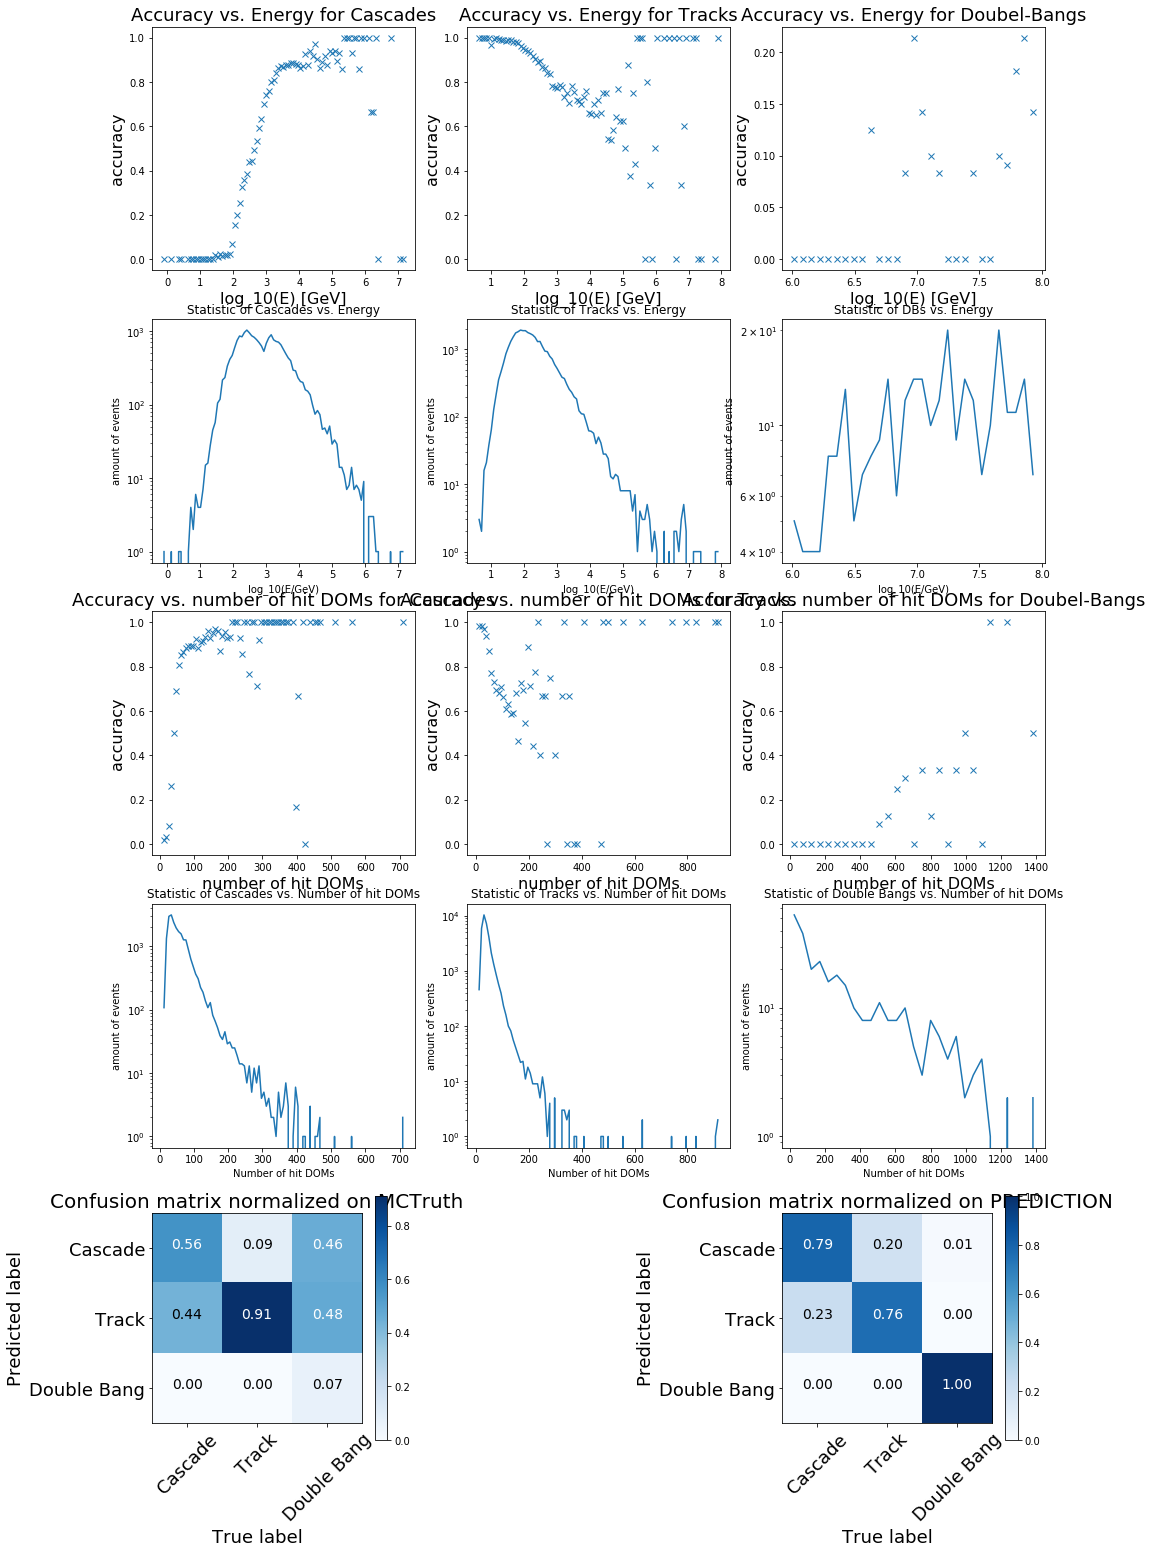

In [15]:
fig = plt.figure(figsize=(16, 26))

ax1 = plt.subplot2grid((5, 3), (0, 0))
ax1 = pfmk.acc_vs_energy_plot(pred_for_class1, 0, E_for_class1, "Accuracy vs. Energy for Cascades", 100)

ax2 = plt.subplot2grid((5, 3), (0, 1))
ax2 = pfmk.acc_vs_energy_plot(pred_for_class2, 1, E_for_class2, "Accuracy vs. Energy for Tracks", 100)

ax3 = plt.subplot2grid((5, 3), (0, 2))
ax3 = pfmk.acc_vs_energy_plot(pred_for_class3, 2, E_for_class3, "Accuracy vs. Energy for Doubel-Bangs", 30)

ax4 = plt.subplot2grid((5, 3), (1, 0))
bins = np.linspace(np.min(np.log10(E_for_class1)), np.max(np.log10(E_for_class1)), 100)
valsAll = np.histogram(np.log10(E_for_class1), bins=bins)[0]
ax4.semilogy(bins[:-1], valsAll)
ax4.set_title("Statistic of Cascades vs. Energy")
ax4.set_xlabel('log_10(E/GeV)')
ax4.set_ylabel('amount of events')

ax5 = plt.subplot2grid((5, 3), (1, 1))
bins = np.linspace(np.min(np.log10(E_for_class2)), np.max(np.log10(E_for_class2)), 100)
valsAll = np.histogram(np.log10(E_for_class2), bins=bins)[0]
ax5.semilogy(bins[:-1], valsAll)
ax5.set_title("Statistic of Tracks vs. Energy")
ax5.set_xlabel('log_10(E/GeV)')
ax5.set_ylabel('amount of events')

ax6 = plt.subplot2grid((5, 3), (1, 2))
bins = np.linspace(np.min(np.log10(E_for_class3)), np.max(np.log10(E_for_class3)), 30)
valsAll = np.histogram(np.log10(E_for_class3), bins=bins)[0]
ax6.semilogy(bins[:-1], valsAll)
ax6.set_title("Statistic of DBs vs. Energy")
ax6.set_xlabel('log_10(E/GeV)')
ax6.set_ylabel('amount of events')

ax7 = plt.subplot2grid((5, 3), (2, 0))
ax7 = pfmk.acc_vs_hitDOMs_plot(pred_for_class1, 0, hitDOMs_for_class1, "Accuracy vs. number of hit DOMs for Cascades", 100)

ax8 = plt.subplot2grid((5, 3), (2, 1))
ax8 = pfmk.acc_vs_hitDOMs_plot(pred_for_class2, 1, hitDOMs_for_class2, "Accuracy vs. number of hit DOMs for Tracks", 100)

ax9 = plt.subplot2grid((5, 3), (2, 2))
ax9 = pfmk.acc_vs_hitDOMs_plot(pred_for_class3, 2, hitDOMs_for_class3, "Accuracy vs. number of hit DOMs for Doubel-Bangs", 30)

ax10 = plt.subplot2grid((5, 3), (3, 0))
bins = np.linspace(np.min(hitDOMs_for_class1), np.max(hitDOMs_for_class1), 100)
valsAll = np.histogram(hitDOMs_for_class1, bins=bins)[0]
ax10.semilogy(bins[:-1], valsAll)
ax10.set_title("Statistic of Cascades vs. Number of hit DOMs")
ax10.set_xlabel('Number of hit DOMs')
ax10.set_ylabel('amount of events')

ax11= plt.subplot2grid((5, 3), (3, 1))
bins = np.linspace(np.min(hitDOMs_for_class2), np.max(hitDOMs_for_class2), 100)
valsAll = np.histogram(hitDOMs_for_class2, bins=bins)[0]
ax11.semilogy(bins[:-1], valsAll)
ax11.set_title("Statistic of Tracks vs. Number of hit DOMs")
ax11.set_xlabel('Number of hit DOMs')
ax11.set_ylabel('amount of events')

ax12= plt.subplot2grid((5, 3), (3, 2))
bins = np.linspace(np.min(hitDOMs_for_class3), np.max(hitDOMs_for_class3), 30)
valsAll = np.histogram(hitDOMs_for_class3, bins=bins)[0]
ax12.semilogy(bins[:-1], valsAll)
ax12.set_title("Statistic of Double Bangs vs. Number of hit DOMs")
ax12.set_xlabel('Number of hit DOMs')
ax12.set_ylabel('amount of events')

ax13 = plt.subplot2grid((5, 3), (4, 0))
pfmk.plot_confusion_matrix(res_true, classes=classes, title='Confusion matrix normalized on MCTruth')

ax14 = plt.subplot2grid((5, 3), (4, 2))
pfmk.plot_confusion_matrix(res_pred, classes=classes, title='Confusion matrix normalized on PREDICTION')

## Target 2: Starting

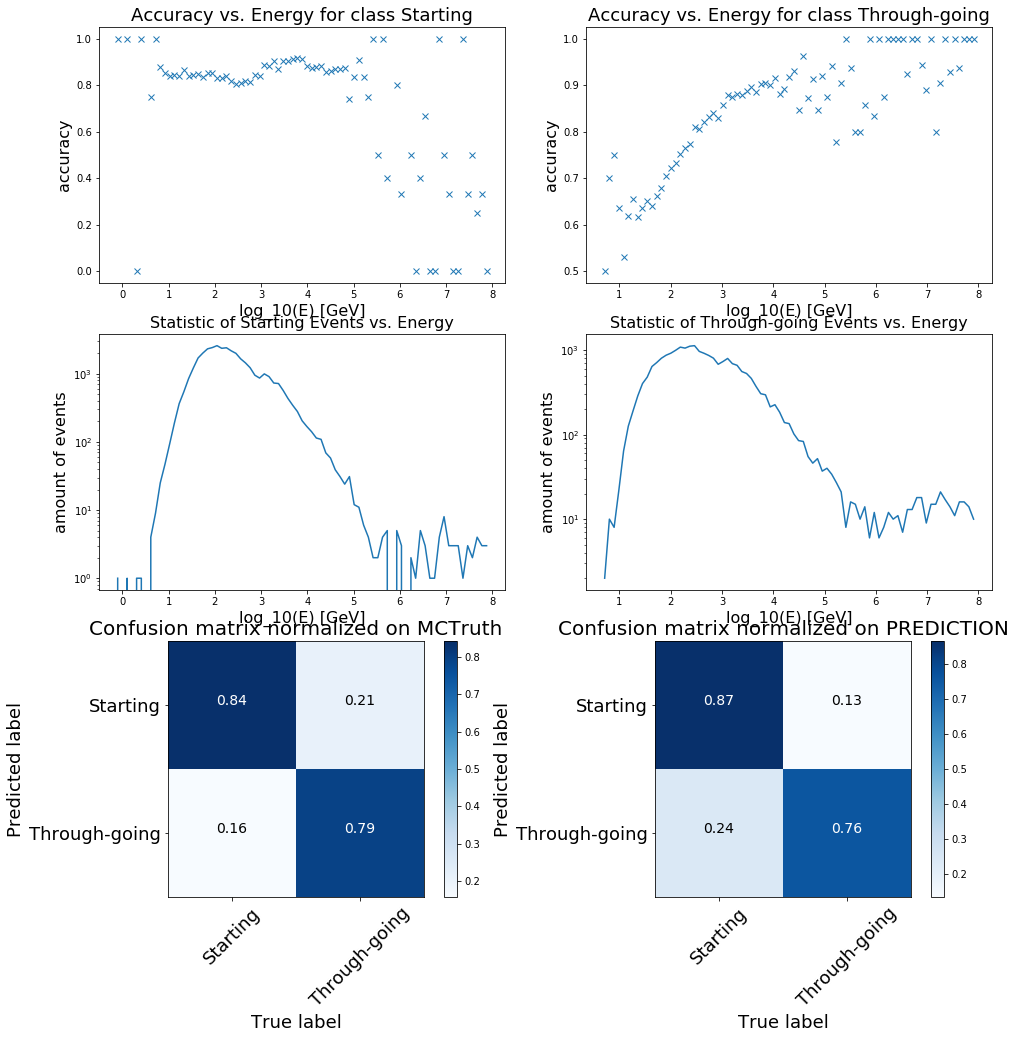

In [20]:
pfmk.summary_plot_binary_target(pred_label_2, true_label_2, ("Starting", "Through-going"), energy, 80)

## Target 3: Coinvidence

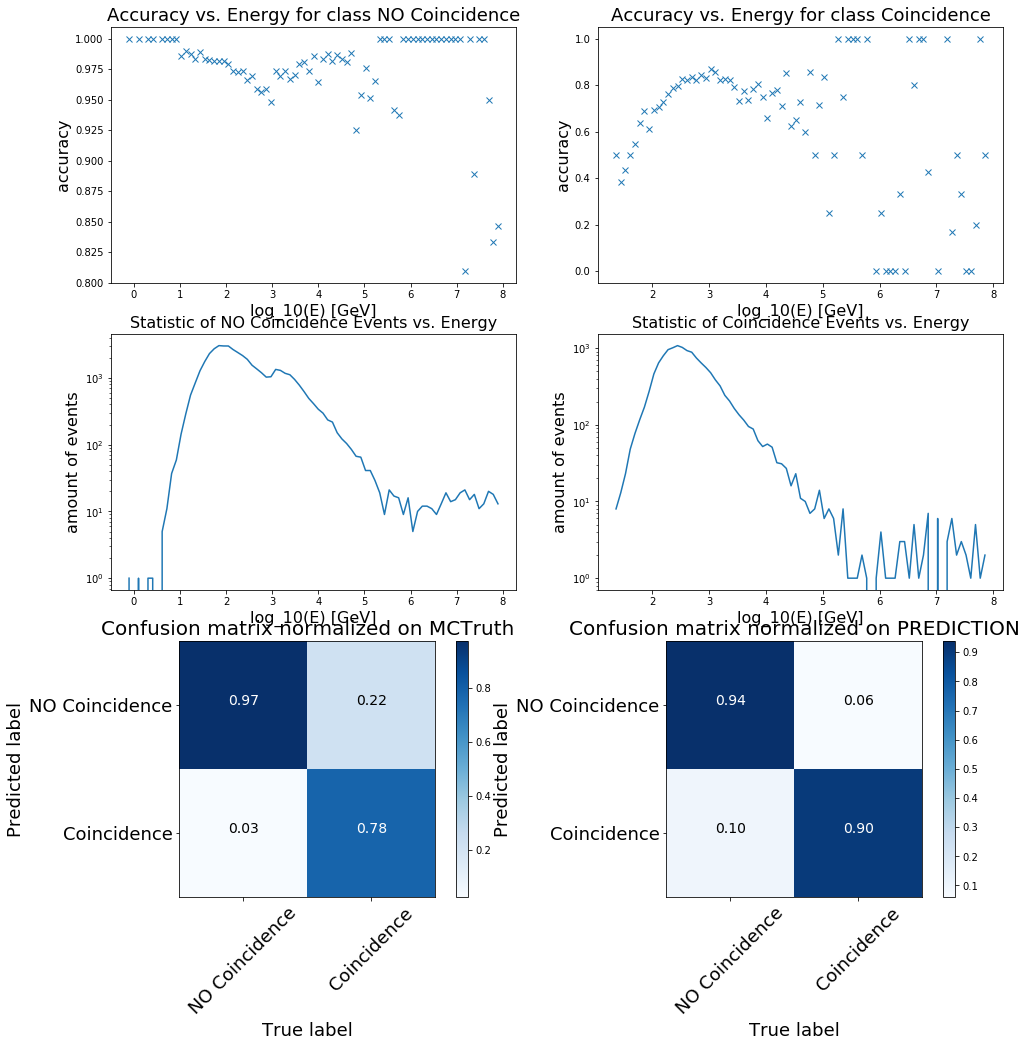

In [21]:
pfmk.summary_plot_binary_target(pred_label_3, true_label_3, ("NO Coincidence", "Coincidence"), energy, 80)

## Target 4: UpDown-going

In [ ]:
pfmk.summary_plot_binary_target(pred_label_4, true_label_4, ("DOWN-going", "UP-going"), energy, 30)

In [ ]:
# plot acc vs zenith
# zenith is implemented to be saved in reco_vals in the next hdf generation

## Overall Performance

In [11]:
def performence_target(pred, true):
    NN_correct = 0
    for i in xrange(len(true)):
        if np.argmax(pred[i]) == true[i]:
            NN_correct += 1
    return 1.*NN_correct/len(true)*100

In [12]:
overall_performance = (performence_target(pred_label_1 , true_label_1)+performence_target(pred_label_2 , true_label_2)+performence_target(pred_label_3 , true_label_3)+performence_target(pred_label_4 , true_label_4))/4
print "Overall Performence: {}".format(overall_performance)
print "\n"
print "Event Typology: {}".format(performence_target(pred_label_1 , true_label_1))
print "Starting      : {}".format(performence_target(pred_label_2 , true_label_2))
print "Coincidence   : {}".format(performence_target(pred_label_3 , true_label_3))
print "UpDown        : {}".format(performence_target(pred_label_4 , true_label_4))

# possibility to claculate the acc for the target possibilities, for example acc for track


Overall Performence: 81.242464539


Event Typology: 76.2730496454
Starting      : 81.3457446809
Coincidence   : 93.420212766
UpDown        : 73.9308510638
